In [1]:
import wilson
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from MuonConverter import Interface

 The scalar $R_2$ is in the $(\mathbf{3}, \mathbf{2},7/6)$ representation of the SM gauge group, with the interaction Lagrangian given by
$$
\begin{split}
{\cal L} & \supset -y_{2\,ij}^{RL}\, \bar u_R^{i} R^a_2 \epsilon^{ab} L_L^{j,b}+y_{2\,ij}^{LR}\,\bar e_R^{i} R_2^{a\,*} Q_L^{j,a}+{\rm h.c.},
\end{split}
$$
where the summation over flavor indices, $i,j=1,2,3$ and electroweak SU(2) indices $a,b=1,2$ is implicit, and we do not display the contraction of color indices. 


Integrating out the leptoquark at tree level gives the following nonzero contributions to SMEFT Wilson coefficients:

$$
    \begin{split}
         C_{\substack{\ell u~~ \\ 12ii}}&=-\frac{1}{2m_{LQ}^2}y_{2\,i2}^{RL}y_{2\,i1}^{RL*},\\
         C_{\substack{q e~~ \\ ii12}}&=-\frac{1}{2m_{LQ}^2}y_{2\,2i}^{LR*}y_{2\,1i}^{LR},\\
        C^{(1)}_{\substack{\ell equ \\ 12ii}}&=2C^{(3)}_{\substack{\ell equ \\ 12ii}}=-\frac{1}{2m_{LQ}^2}y_{2\,2i}^{LR*}y_{2\,i1}^{RL*},\\
        C^{(1)*}_{\substack{\ell equ \\ 21ii}}&=2C^{(3)*}_{\substack{\ell equ \\ 21ii}}=-\frac{1}{2m_{LQ}^2}y_{2\,i2}^{LR}y_{2\,1i}^{RL},
    \end{split}
$$

In [2]:
# Define the SMEFT Wilson coefficients
lu_1211 = lambda mLQ, yRL_12, yRL_11: - (1 / (2 * mLQ**2)) * yRL_12 * np.conjugate(yRL_11)
lu_1222 = lambda mLQ, yRL_22, yRL_21: - (1 / (2 * mLQ**2)) * yRL_22 * np.conjugate(yRL_21)
lu_1233 = lambda mLQ, yRL_32, yRL_31: - (1 / (2 * mLQ**2)) * yRL_32 * np.conjugate(yRL_31)

qe_1112 = lambda mLQ, yLR_21, yLR_11: - (1 / (2 * mLQ**2)) * np.conjugate(yLR_21) * yLR_11
qe_2212 = lambda mLQ, yLR_22, yLR_12: - (1 / (2 * mLQ**2)) * np.conjugate(yLR_22) * yLR_12
qe_3312 = lambda mLQ, yLR_23, yLR_13: - (1 / (2 * mLQ**2)) * np.conjugate(yLR_23) * yLR_13

lequ1_1211 = lambda mLQ, yLR_21, yRL_11: - (1 / (2 * mLQ**2)) * np.conjugate(yLR_21) * np.conjugate(yRL_11)
lequ1_1222 = lambda mLQ, yLR_22, yRL_21: - (1 / (2 * mLQ**2)) * np.conjugate(yLR_22) * np.conjugate(yRL_21)
lequ1_1233 = lambda mLQ, yLR_23, yRL_31: - (1 / (2 * mLQ**2)) * np.conjugate(yLR_23) * np.conjugate(yRL_31)

lequ3_1211 = lambda mLQ, yLR_21, yRL_11: - (1 / (4 * mLQ**2)) * np.conjugate(yLR_21) * np.conjugate(yRL_11)
lequ3_1222 = lambda mLQ, yLR_22, yRL_21: - (1 / (4 * mLQ**2)) * np.conjugate(yLR_22) * np.conjugate(yRL_21)
lequ3_1233 = lambda mLQ, yLR_23, yRL_31: - (1 / (4 * mLQ**2)) * np.conjugate(yLR_23) * np.conjugate(yRL_31)

lequ1_2111 = lambda mLQ, yLR_12, yRL_11: - (1 / (2 * mLQ**2)) * np.conjugate(yLR_12) * np.conjugate(yRL_11)
lequ1_2122 = lambda mLQ, yLR_22, yRL_12: - (1 / (2 * mLQ**2)) * np.conjugate(yLR_22) * np.conjugate(yRL_12)
lequ1_2133 = lambda mLQ, yLR_32, yRL_13: - (1 / (2 * mLQ**2)) * np.conjugate(yLR_32) * np.conjugate(yRL_13)

lequ3_2111 = lambda mLQ, yLR_12, yRL_11: - (1 / (4 * mLQ**2)) * np.conjugate(yLR_12) * np.conjugate(yRL_11)
lequ3_2122 = lambda mLQ, yLR_22, yRL_12: - (1 / (4 * mLQ**2)) * np.conjugate(yLR_22) * np.conjugate(yRL_12)
lequ3_2133 = lambda mLQ, yLR_32, yRL_13: - (1 / (4 * mLQ**2)) * np.conjugate(yLR_32) * np.conjugate(yRL_13)

In [3]:
# Define the UV and IR EFT basis'
eft_UV = 'SMEFT'
basis_UV = 'Warsaw'
eft_IR = 'WET-3'
basis_IR = 'JMS'

# Initialize list with relevant CLFV SMEFT operators
SMEFT_mue_sector = ['phil1_12', 'phil3_12', 'phie_12', 'ephi_12', 'eW_12', 'eB_12',  
                    'll_1112', 'll_1212', 'll_1213', 'll_1221', 'll_1222', 'll_1223', 'll_1231', 'll_1232', 'll_1233', 
                    'lq1_1211', 'lq1_1212', 'lq1_1213', 'lq1_1221', 'lq1_1222', 'lq1_1223', 'lq1_1231', 'lq1_1232', 'lq1_1233',
                    'lq3_1211', 'lq3_1212', 'lq3_1213', 'lq3_1221', 'lq3_1222', 'lq3_1223', 'lq3_1231', 'lq3_1232', 'lq3_1233', 
                    'ee_1112', 'ee_1212', 'ee_1213', 'ee_1222', 'ee_1223', 'ee_1232', 'ee_1233',
                    'eu_1211', 'eu_1212', 'eu_1213', 'eu_1221', 'eu_1222', 'eu_1223', 'eu_1231', 'eu_1232', 'eu_1233', 
                    'ed_1211', 'ed_1212', 'ed_1213', 'ed_1221', 'ed_1222', 'ed_1223', 'ed_1231', 'ed_1232', 'ed_1233', 
                    'le_1211', 'le_1212', 'le_1213', 'le_1221', 'le_1222', 'le_1223', 'le_1231', 'le_1232', 'le_1233', 'le_1312', 'le_2212', 'le_2312', 'le_3312', 
                    'lu_1211', 'lu_1212', 'lu_1213', 'lu_1221', 'lu_1222', 'lu_1223', 'lu_1231', 'lu_1232', 'lu_1233', 
                    'ld_1211', 'ld_1212', 'ld_1213', 'ld_1221', 'ld_1222', 'ld_1223', 'ld_1231', 'ld_1232', 'ld_1233', 
                    'qe_1112', 'qe_1212', 'qe_1312', 'qe_2212', 'qe_2312', 'qe_3312',
                    'ledq_1211', 'ledq_1212', 'ledq_1213', 'ledq_1221', 'ledq_1222', 'ledq_1223', 'ledq_1231', 'ledq_1232', 'ledq_1233', 'ledq_2111', 'ledq_2112', 'ledq_2113', 'ledq_2121', 'ledq_2122', 'ledq_2123', 'ledq_2131', 'ledq_2132', 'ledq_2133',
                    'lequ1_1211', 'lequ1_1212', 'lequ1_1213', 'lequ1_1221', 'lequ1_1222', 'lequ1_1223', 'lequ1_1231', 'lequ1_1232', 'lequ1_1233', 'lequ1_2111', 'lequ1_2112', 'lequ1_2113', 'lequ1_2121', 'lequ1_2122', 'lequ1_2123', 'lequ1_2131', 'lequ1_2132', 'lequ1_2133',
                    'lequ3_1211', 'lequ3_1212', 'lequ3_1213', 'lequ3_1221', 'lequ3_1222', 'lequ3_1223', 'lequ3_1231', 'lequ3_1232', 'lequ3_1233', 'lequ3_2111', 'lequ3_2112', 'lequ3_2113', 'lequ3_2121', 'lequ3_2122', 'lequ3_2123', 'lequ3_2131', 'lequ3_2132', 'lequ3_2133'
                    ]

# Initialize list with relevant CLFV WET-3 operators
WET_mue_sector = ['egamma_12', 
                  'VeuLL_1211', 'VedLL_1211', 'VedLL_1222', 
                  'VeuRR_1211', 'VedRR_1211', 'VedRR_1222', 
                  'VeuLR_1211', 'VedLR_1211', 'VedLR_1222','VueLR_1112', 'VdeLR_1112', 'VdeLR_2212', 
                  'SeuRL_1211', 'SedRL_1211', 'SedRL_1222', 'SeuRR_1211', 'SedRR_1211', 'SedRR_1222', 
                  'TeuRR_1211', 'TedRR_1211', 'TedRR_1222']

# Input parameters for Mu2e_NRET
q = [0.,0.,0.,0.11081] # Momentum transfer q_eff(Al)
element     = 'Al'
isotope     = 0
interaction = 'bw'
oscb        = 0
isochar     = 'proton'

In [ ]:
# Initialize the leptoquark mass
mLQ = 1e6 # GeV


# Initalize placeholder dictionary
wc_dict_i = {}

# Set the leptoquark Yukawas
y12RL = 1e-1
y12LR = 1e-1
y21RL = 1e-1
y21LR = 1e-1
y11RL = 1e-1
y11LR = 1e-1
y22RL = 1e-1
y22LR = 1e-1
y13RL = 1e-1
y13LR = 1e-1
y31RL = 1e-1
y31LR = 1e-1
y32RL = 1e-1
y32LR = 1e-1
y23RL = 1e-1
y23LR = 1e-1
y33RL = 1e-1
y33LR = 1e-1

# Initialize the leptoquark SMEFT dictionary 
leptoquark_dict = {'lu_1211': lu_1211(mLQ, y12RL, y11RL), 'lu_1222': lu_1222(mLQ, y22RL, y21RL), 'lu_1233': lu_1233(mLQ, y32RL, y31RL),
                    'qe_1112': qe_1112(mLQ, y21LR, y11LR), 'qe_2212': qe_2212(mLQ, y22LR, y12LR), 'qe_3312': qe_3312(mLQ, y23LR, y13LR),
                    'lequ1_1211': lequ1_1211(mLQ, y21LR, y11RL), 'lequ1_1222': lequ1_1222(mLQ, y22LR, y21RL), 'lequ1_1233': lequ1_1233(mLQ, y23LR, y31RL),
                    'lequ3_1211': lequ3_1211(mLQ, y21LR, y11RL), 'lequ3_1222': lequ3_1222(mLQ, y22LR, y21RL), 'lequ3_1233': lequ3_1233(mLQ, y23LR, y31RL),
                    'lequ1_2111': lequ1_2111(mLQ, y12LR, y11RL), 'lequ1_2122': lequ1_2122(mLQ, y22LR, y12RL), 'lequ1_2133': lequ1_2133(mLQ, y32LR, y13RL),
                    'lequ3_2111': lequ3_2111(mLQ, y12LR, y11RL), 'lequ3_2122': lequ3_2122(mLQ, y22LR, y12RL), 'lequ3_2133': lequ3_2133(mLQ, y32LR, y13RL)
                    }

# Set the UV scale under the assumption: wc = C/Lambda_UV^2 with C~1
Lambda_UV = mLQ
# Set the IR scale where the non-perturbative matching will occur
Lambda_IR = 2 # GeV

# Initialize Wilson object
willy = wilson.Wilson(leptoquark_dict, scale = Lambda_UV, eft = eft_UV, basis = basis_UV)
# Choose RGE evolution scheme ['integrate' or 'leadinglog']
willy.set_option('smeft_accuracy', 'integrate')

# Run down to nuclear scale
wc_i = willy.match_run(scale = Lambda_IR, eft = eft_IR, basis = basis_IR, sectors = 'mue')

# Extract the relevant mue WC values
for keys in WET_mue_sector:
    wc_dict_i[keys] = wc_i[keys]

# Initialize the MuonConverter class
MuonConverter = Interface(wc_dict_i, q)

# Compute the capture ratio, decay rate, and data dictionary containing information on nuclear responses
capture_ratio, Gamma, response_data = MuonConverter.compute_rate(element, isotope, interaction, oscb, isochar, input_basis = 'JMS')

In [9]:
print('Capture ratio: ', capture_ratio)
print('Decay rate: ', Gamma)

Capture ratio:  3.005579461823295e-16
Decay rate:  2.0984955802450245e-10


We can access information pertaining to the nuclear responses through the ```response_data``` dictionary that was also returned when we computed the decay rate/capture ratio.

In [5]:
# Initialize a list of all possible nuclear response keys
nuclear_response_components = ['M_RW_00', 'M_RW_11', 'M_RW_10', 'M_RW_01', 'PhiPP_RW_00', 'PhiPP_RW_11', 'PhiPP_RW_10', 'PhiPP_RW_01', 'PhiPPM_RW_00', 
                               'PhiPPM_RW_11', 'PhiPPM_RW_10', 'PhiPPM_RW_01', 'PhiTP_RW_00', 'PhiTP_RW_11', 'PhiTP_RW_10', 'PhiTP_RW_01', 'SigmaPP_RW_00', 
                               'SigmaPP_RW_11', 'SigmaPP_RW_10', 'SigmaPP_RW_01', 'Delta_RW_00', 'Delta_RW_11', 'Delta_RW_10', 'Delta_RW_01', 'SigmaP_RW_00', 
                               'SigmaP_RW_11', 'SigmaP_RW_10', 'SigmaP_RW_01', 'DeltaSigmaP_RW_00', 'DeltaSigmaP_RW_11', 'DeltaSigmaP_RW_10', 'DeltaSigmaP_RW_01', 
                               'M1_RW_00', 'M1_RW_11', 'M1_RW_10', 'M1_RW_01', 'M2_RW_00', 'M2_RW_11', 'M2_RW_10', 'M2_RW_01', 'SigmaP0_RW_00', 'SigmaP0_RW_11', 
                               'SigmaP0_RW_10', 'SigmaP0_RW_01', 'SigmaP2_RW_00', 'SigmaP2_RW_11', 'SigmaP2_RW_10', 'SigmaP2_RW_01', 'SigmaPP0_RW_00', 'SigmaPP0_RW_11', 
                               'SigmaPP0_RW_10', 'SigmaPP0_RW_01', 'SigmaPP2_RW_00', 'SigmaPP2_RW_11', 'SigmaPP2_RW_10', 'SigmaPP2_RW_01', 'SigmaP0SigmaP2_RW_00', 
                               'SigmaP0SigmaP2_RW_11', 'SigmaP0SigmaP2_RW_10', 'SigmaP0SigmaP2_RW_01', 'SigmaPP0SigmaPP2_RW_00', 'SigmaPP0SigmaPP2_RW_11', 
                               'SigmaPP0SigmaPP2_RW_10', 'SigmaPP0SigmaPP2_RW_01', 'MM2_RW_00', 'MM2_RW_11', 'MM2_RW_10', 'MM2_RW_01', 'PhiPPM2_RW_00', 'PhiPPM2_RW_11', 
                               'PhiPPM2_RW_10', 'PhiPPM2_RW_01', 'PhiTPM1_RW_00', 'PhiTPM1_RW_11', 'PhiTPM1_RW_10', 'PhiTPM1_RW_01', 'SigmaP0SigmaP_RW_00', 'SigmaP0SigmaP_RW_11', 
                               'SigmaP0SigmaP_RW_10', 'SigmaP0SigmaP_RW_01', 'SigmaP2SigmaP_RW_00', 'SigmaP2SigmaP_RW_11', 'SigmaP2SigmaP_RW_10', 'SigmaP2SigmaP_RW_01', 
                               'DeltaSigmaP0_RW_00', 'DeltaSigmaP0_RW_11', 'DeltaSigmaP0_RW_10', 'DeltaSigmaP0_RW_01', 'DeltaSigmaP2_RW_00', 'DeltaSigmaP2_RW_11', 
                               'DeltaSigmaP2_RW_10', 'DeltaSigmaP2_RW_01', 'SigmaPP0SigmaPP_RW_00', 'SigmaPP0SigmaPP_RW_11', 'SigmaPP0SigmaPP_RW_10', 'SigmaPP0SigmaPP_RW_01', 
                               'SigmaPP2SigmaPP_RW_00', 'SigmaPP2SigmaPP_RW_11', 'SigmaPP2SigmaPP_RW_10', 'SigmaPP2SigmaPP_RW_01']

Recall the definitions
$$
|OO'|_{\tau \tau'} \equiv \frac{|R_{OO'}^{\tau \tau'}W_{OO'}^{\tau \tau'}|}{\sum_{\tau \tau' O O'} |R_{OO'}^{\tau \tau'}W_{OO'}^{\tau \tau'}|}, \quad (OO')_{\tau \tau'} \equiv \frac{R_{OO'}^{\tau \tau'}W_{OO'}^{\tau \tau'}}{\sum_{\tau \tau' O O'} R_{OO'}^{\tau \tau'}W_{OO'}^{\tau \tau'}}
$$

In [6]:
# Get \sum |RW| and \sum RW
abs_RW_sum = 0
RW_sum = 0

for component in nuclear_response_components:
    abs_RW_sum += np.abs(response_data[component])
    RW_sum += response_data[component]

print('Sum |RW|:', abs_RW_sum)
print('Sum RW:', RW_sum)
print()

# We can start by printing out all of the non-zero entries
for component in nuclear_response_components:
    if np.real(response_data[component]) != 0.0:
        print('Component:', component, '\n', 'Value:', response_data[component], '\n', '~% of total rate:', np.abs(response_data[component]) / abs_RW_sum)
        print('----------------------------------')

Sum |RW|: 3.9774283767701907e-25
Sum RW: (3.4063856501719484e-25+1.044048714879764e-53j)

Component: M_RW_00 
 Value: (3.682036950781222e-25+0j) 
 ~% of total rate: 0.9257330621679637
----------------------------------
Component: M_RW_11 
 Value: (6.00397053351068e-28+0j) 
 ~% of total rate: 0.0015095106598465291
----------------------------------
Component: M_RW_10 
 Value: (-1.4262925207254635e-26-8.320560684694765e-34j) 
 ~% of total rate: 0.03585966573416124
----------------------------------
Component: M_RW_01 
 Value: (-1.4262925207254635e-26+8.320560684694765e-34j) 
 ~% of total rate: 0.03585966573416124
----------------------------------
Component: PhiPP_RW_00 
 Value: (2.0793055845759864e-32+0j) 
 ~% of total rate: 5.227763739807313e-08
----------------------------------
Component: PhiPP_RW_11 
 Value: (4.793980144932549e-34+0j) 
 ~% of total rate: 1.2052964103467846e-09
----------------------------------
Component: PhiPP_RW_10 
 Value: (-2.3036048188069378e-33+0j) 
 ~% of tot

In [7]:
# For convenience...

# Grab the most relevant responses
nonzero_component_vals = {}
for component in nuclear_response_components:
    if np.real(response_data[component]) != 0.0 and np.abs(response_data[component]) / abs_RW_sum > 1e-7:
        nonzero_component_vals[component] = np.round(np.abs(response_data[component]) / abs_RW_sum, 8)

# Sort the dictionary from largest to smallest
nonzero_component_keys_sorted = sorted(nonzero_component_vals, key = nonzero_component_vals.get, reverse = True)

# Print the sorted dictionary
for keys in nonzero_component_keys_sorted:
    print(keys, nonzero_component_vals[keys])

M_RW_00 0.92573306
M_RW_10 0.03585967
M_RW_01 0.03585967
M_RW_11 0.00150951
PhiPPM_RW_00 0.00043575
SigmaPP_RW_00 0.00013341
SigmaPP_RW_10 6.488e-05
SigmaPP_RW_01 6.488e-05
PhiPPM_RW_10 4.881e-05
DeltaSigmaP_RW_01 4.846e-05
DeltaSigmaP_RW_11 3.915e-05
Delta_RW_00 3.358e-05
SigmaPP_RW_11 3.166e-05
SigmaP_RW_11 2.494e-05
Delta_RW_10 2.305e-05
Delta_RW_01 2.305e-05
PhiPPM_RW_01 1.727e-05
Delta_RW_11 1.606e-05
DeltaSigmaP_RW_00 1.124e-05
DeltaSigmaP_RW_10 9.31e-06
SigmaP_RW_10 5e-06
SigmaP_RW_01 5e-06
PhiPPM_RW_11 1.48e-06
SigmaP_RW_00 1.05e-06


/tmp/ipykernel_210741/3533757354.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(components, rotation=45)


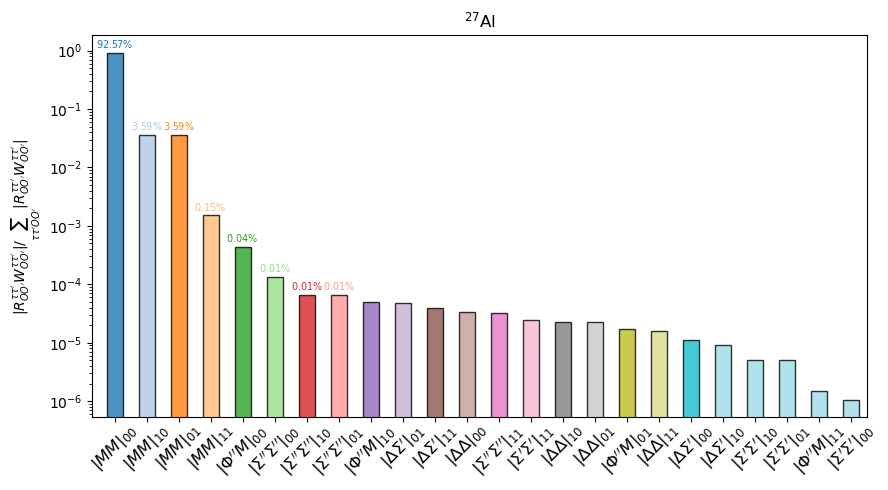

In [8]:
# Plot the response decomposition
labels = {'M_RW_00':r'$|MM|_{00}$', 'PhiPPM_RW_00':r"$|\Phi''M|_{00}$", 'SigmaPP_RW_11':r"$|\Sigma''\Sigma''|_{11}$", 'SigmaP_RW_11': r"$|\Sigma'\Sigma'|_{11}$", 
        'SigmaPP_RW_01':r"$|\Sigma''\Sigma''|_{01}$", 'SigmaPP_RW_10':r"$|\Sigma''\Sigma''|_{10}$", 'PhiPPM_RW_10':r"$|\Phi''M|_{10}$", 'PhiPPM_RW_01':r"$|\Phi''M|_{01}$", 
        'PhiPP_RW_00':r"$|\Phi''\Phi''|_{00}$", 'SigmaP_RW_01': r"$|\Sigma'\Sigma'|_{01}$", 'SigmaP_RW_10': r"$|\Sigma'\Sigma'|_{10}$",
        'M_RW_01':r'$|MM|_{01}$', 'M_RW_10':r'$|MM|_{10}$', 'SigmaPP_RW_00':r"$|\Sigma''\Sigma''|_{00}$", 'SigmaP_RW_00':r"$|\Sigma'\Sigma'|_{00}$", 'PhiPPM_RW_01':r"$|\Phi''M|_{01}$", 'PhiPPM_RW_10':r"$|\Phi''M|_{10}$",
        'DeltaSigmaP_RW_01':r"$|\Delta\Sigma'|_{01}$", 'DeltaSigmaP_RW_10':r"$|\Delta\Sigma'|_{10}$", 'DeltaSigmaP_RW_00':r"$|\Delta\Sigma'|_{00}$", 'PhiPP_RW_01': r"$|\Phi''\Phi''|_{01}$", 'PhiPP_RW_10': r"$|\Phi''\Phi''|_{10}$",
        'SigmaPP_RW_01':r"$|\Sigma'' \Sigma''|_{01}$", 'SigmaPP_RW_10':r"$|\Sigma'' \Sigma''|_{10}$", 'DeltaSigmaP_RW_11':r"$|\Delta\Sigma'|_{11}$", 'DeltaSigmaP_RW_10':r"$|\Delta\Sigma'|_{10}$",
        'PhiPPM_RW_11':r"$|\Phi''M|_{11}$", 'M_RW_11':r"$|MM|_{11}$", 'PhiPP_RW_11':r"$|\Phi''\Phi''|_{11}$", 'PhiTP_RW_11':r"$|\tilde{\Phi}'\tilde{\Phi}'|_{11}$", 
        'Delta_RW_00':r"$|\Delta \Delta|_{00}$", 'Delta_RW_01':r"$|\Delta \Delta|_{01}$", 'Delta_RW_10':r"$|\Delta \Delta|_{10}$", 'Delta_RW_11':r"$|\Delta \Delta|_{11}$"}

colormap = plt.get_cmap('tab20')
colors = [colormap(k) for k in range(len(nonzero_component_keys_sorted))]

fig, ax = plt.subplots(1,1,figsize=(9,5))
components = [labels[keys] for keys in nonzero_component_keys_sorted]
b = ax.bar(components, [nonzero_component_vals[keys] for keys in nonzero_component_keys_sorted], width = 0.5, color = colors, edgecolor = 'black', alpha = 0.8, rasterized = True)
# Rotate the x-axis labels
ax.set_xticklabels(components, rotation=45)
ax.tick_params(axis='x', pad=-1)
# Create the bar labels
l = ax.bar_label(b, labels=[rf'${nonzero_component_vals[keys]*100:.2f}\%$' if nonzero_component_vals[keys]*100 > 0.005 else '' for keys in nonzero_component_keys_sorted], padding=2, fontsize=7)
# Set the bar label colors
for (label, color) in zip(l, colors):
    label.set_color(color)

ax.set_ylabel(r"$|R^{\tau \tau'}_{OO'} W^{\tau \tau'}_{OO'}| / \sum_{\tau \tau' OO'}|R^{\tau \tau'}_{OO'} W^{\tau \tau'}_{OO'}|$")
ax.set_yscale('log')
ax.set_title(r'$\mathrm{^{27}Al}$')
plt.xticks(fontsize = 12)
ax.set_xlim(-0.7, len(components)-0.5)

fig.tight_layout()